In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "data/dogbreeds/"
arch = resnext50
sz = 299
bs = 28

In [3]:
# Set up transformation, trainig data, and model architecture
tfms = tfms_from_model(
    arch, 
    sz, 
    aug_tfms=transforms_side_on, 
    max_zoom=1.1)
data = ImageClassifierData.from_csv(
    PATH, 
    folder='train', 
    csv_fname=PATH + 'labels.csv', 
    suffix='.jpg',
    tfms=tfms, 
    bs=bs, 
    num_workers=4,
    test_name='test')
learn = ConvLearner.pretrained(
    arch, 
    data, 
    precompute=True, 
    ps=0.5)

In [4]:
img = PIL.Image.open(PATH + data.trn_ds.fnames[0])

In [5]:
img.size

(500, 375)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 84%|████████▍ | 247/293 [00:05<00:00, 46.59it/s, loss=11.8]


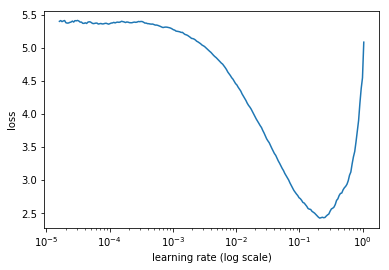

In [6]:
lrf = learn.lr_find()
learn.sched.plot()

In [ ]:
#learn.fit(1e-2, 6, cycle_len=1)

## Differential learning rates

In [7]:
learn.unfreeze()
lr = np.array([1e-4, 1e-3, 1e-2])

In [8]:
learn.fit(lr, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.147588   0.568817   0.876712  
    1      0.617068   0.32264    0.903131                    
    2      0.533982   0.312072   0.907534                    
    3      0.503522   0.356167   0.891389                    
    4      0.37357    0.28185    0.907534                    
    5      0.424724   0.260654   0.912916                    
    6      0.333101   0.259631   0.90998                     
    7      0.363925   0.315921   0.891389                    
    8      0.337362   0.270972   0.907534                    
    9      0.269288   0.271718   0.912427                    
    10     0.290392   0.270236   0.907045                    
    11     0.227667   0.258253   0.912427                    
    12     0.221249   0.255886   0.90998                     
    13     0.251357   0.263641   0.908513                    
    14     0.236734   0.258107   0.909491                    
    15     0.304952   0.295

[0.26776594, 0.9163405046071091]

In [12]:
learn.save('dogbreed_299_3lastlayers')

## Predict on test set

In [11]:
# Predictions for test dataset
preds = np.exp(learn.predict(is_test=True))

In [13]:
# Filenames of test data
files_test = [x.split("/")[1].split(".")[0] for x in data.test_dl.dataset.fnames]
# Sample submission kaggle
submission = pd.read_csv('/home/paperspace/data/dogbreeds/sample_submission.csv')

In [14]:
submission['id'] = files_test
submission.iloc[:,1:] = preds

In [17]:
submission.to_csv('~/wd/dogbreeds/submission2.csv', index=False)

In [18]:
!cd ~/wd/dogbreeds/
!kg submit submission2.csv

[Errno 2] No such file or directory: 'submission2.csv'


In [ ]:
#0.24222